## Importing Required Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.listdir('/content/drive/MyDrive')

['Colab Notebooks',
 'Untitled presentation.gslides',
 'CSE_3rd_C_2026_2201640100101_Avantika_Pandey (3).pdf',
 'certificate CSS.pdf',
 'CSE_3rd_C_2026_2201640100101_Avantika_Pandey (2).pdf',
 'CSE_3rd_C_2026_2201640100101_Avantika_Pandey (1).pdf',
 'photoo.jpg',
 'asses (1).sql',
 'asses.sql',
 'SET 1.docx',
 'SET1.SQL.pdf',
 'CSE_3rd_C_2026_2201640100101_Avantika_Pandey.pdf',
 'Salesforce_Agentblazer_Champion.pdf',
 'download.pdf',
 '2201640100101.docx',
 '2201640100101.pdf',
 'student list.gsheet',
 'Plant_Disease_Dataset.zip']

In [5]:
import zipfile

zip_path = '/content/drive/MyDrive/Plant_Disease_Dataset.zip'  # ← Update this if needed
extract_to = '/content/Plant_Disease_Dataset'  # ← Where you want it unzipped

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Pre-processing

### Training Image Preprocessing

In [7]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant_Disease_Dataset/Plant_Disease_Dataset/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    verbose = True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [8]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant_Disease_Dataset/Plant_Disease_Dataset/valid',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    verbose = True,
)

Found 17572 files belonging to 38 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(100, 100, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(38, activation='softmax')  # 38 classes, softmax output
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## Building Model

In [12]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [13]:
model = Sequential()

#### Building a Convolution Layer

In [14]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [16]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [17]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [18]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500, activation='relu'))

In [22]:
model.add(Dropout(0.4))

In [23]:
#Output Layer

model.add(Dense(units=38, activation='softmax'))

#### Compiling Model

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

#### Building the Model

We need to make sure the model is not going through overshooting, overfitting or underfitting.
To avoid Overshooting:
1. Choose small learning rate. Default is 0.001.
2. Increase number of neurons to prevent underfitting.
3. Add more convolution layer to extract more features from images. There may be a possibility that the model is unable to capture relevant feature or model is confused due to lack of features.

### Training Model

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
training_history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 159s 66ms/step - accuracy: 0.0868 - loss: 3.4307 - val_accuracy: 0.5755 - val_loss: 1.3698
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.6076 - loss: 1.2758 - val_accuracy: 0.7654 - val_loss: 0.7441
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 59ms/step - accuracy: 0.7438 - loss: 0.8124 - val_accuracy: 0.8075 - val_loss: 0.6077
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.7913 - loss: 0.6530 - val_accuracy: 0.8260 - val_loss: 0.5533
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 0.8184 - loss: 0.5705 - val_accuracy: 0.8322 - val_loss: 0.5289
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 60ms/step - accuracy: 0.8323 - loss: 0.5273 - val_accuracy: 0.8347 - val_loss: 0.5198
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.8429 - loss: 0.4922 - val_accuracy: 0.8471 - val_loss: 0.5074
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 

## Model Evaluation

In [29]:
#Model Evaluation on Training set
training_loss, training_accuracy = model.evaluate(training_dataset)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9011 - loss: 0.2944


In [30]:
print(training_loss, training_accuracy)

0.28150123357772827 0.9068496823310852


In [32]:
#Model Evaluation on Validation Set
validation_loss, validation_accuracy = model.evaluate(validation_dataset)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8586 - loss: 0.4489


In [33]:
print(validation_loss, validation_accuracy)

0.44510558247566223 0.8609150648117065


## Saving the Model

In [35]:
model.save("trained_model.keras") #for less memory usage

In [36]:
training_history.history

{'accuracy': [0.21463830769062042,
  0.6521658897399902,
  0.7554448843002319,
  0.797752320766449,
  0.8219361305236816,
  0.8348531126976013,
  0.8462194800376892,
  0.8493207097053528,
  0.8533324003219604,
  0.8522796630859375],
 'loss': [2.8213281631469727,
  1.1241276264190674,
  0.7719022035598755,
  0.6321341395378113,
  0.5590964555740356,
  0.5177727937698364,
  0.4808213412761688,
  0.4711413085460663,
  0.4606732428073883,
  0.46985623240470886],
 'val_accuracy': [0.5754609704017639,
  0.7653653621673584,
  0.8074778318405151,
  0.8260300755500793,
  0.8321762084960938,
  0.8346801996231079,
  0.8471431732177734,
  0.8643864989280701,
  0.851980447769165,
  0.8609150648117065],
 'val_loss': [1.369823694229126,
  0.7441110014915466,
  0.6076734662055969,
  0.553337037563324,
  0.5289146900177002,
  0.5198171138763428,
  0.5074173808097839,
  0.4218692481517792,
  0.47702327370643616,
  0.4451057016849518]}

## Recording History in JSON

In [37]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

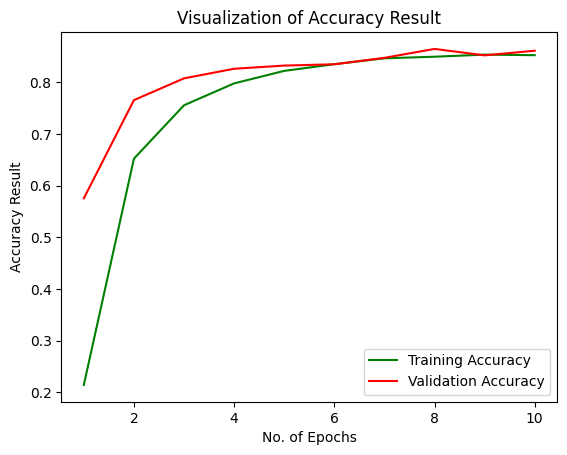

In [38]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history["accuracy"], color = "green", label = "Training Accuracy")
plt.plot(epochs, training_history.history["val_accuracy"], color = "red", label = "Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()